In [ ]:
import math

import matplotlib.pyplot as plt
from functionLibrary import fwdEuler

f = lambda x, y: (y*math.log(y))/x

t1, s1 = fwdEuler(f, 2, 7, 0.5, 2.71828)
t2, s2 = fwdEuler(f, 2, 7, 0.2, 2.71828)
t3, s3 = fwdEuler(f, 2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Explicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [ ]:
import math
import matplotlib.pyplot as plt 
from functionLibrary import bwdEuler


t1, s1 = bwdEuler(2, 7, 0.5, 2.71828)
t2, s2 = bwdEuler(2, 7, 0.2, 2.71828)
t3, s3 = bwdEuler(2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Implicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
from functionLibrary import predCorr
f = lambda y, x: (y*math.log(y))/x

t1, s1 = predCorr(f, 2, 7, 0.5, 2.71828)
t2, s2 = predCorr(f, 2, 7, 0.2, 2.71828)
t3, s3 = predCorr(f, 2, 7, 0.05, 2.71828)

plt.figure(figsize = (12, 8))
plt.plot(t1, s1, label='0.5')
plt.plot(t2, s2, label = '0.2')
plt.plot(t3, s3, label = '0.05')
plt.title('Solutions of ODE by Explicit Euler with different step-sizes')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
def integrate(F,x,y,xStop,h):
    def run_kut4(F,x,y,h):
        K1 = h*F(x,y)
        K2 = h*F(x + h/2.0, y + K1/2.0)
        K3 = h*F(x + h/2.0, y + K2/2.0)
        K4 = h*F(x + h, y + K3)
        return (K1 + 2.0*K2 + 2.0*K3 + K4)/6.0
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h,xStop - x)
        y = y + run_kut4(F,x,y,h)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = 1 - y[1] - x
    return F

x = 0

xStop = 5.0

y = [2.0, 1.0]

h = 0.05

X,Y = integrate(F,x,y,xStop,h)
yExact = 2.0*X - (1/2)*X**2 + (np.exp(-X)) + 1.0
#plt.xlim(-5, 5)
#plt.ylim(-5, 5)
plt.plot(X,Y[:,0],'o', X, yExact, '-')
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(('Numerical','Exact'),loc=0)
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
a = -5
b = 5
dum = []
for i in range(math.ceil((b-a)/h)+1):
    dum.append(a)
    a = a + h


x = 2
v = 1
t = 0
h = 0.05
def dxdt(v, t):
    return v

def dvdt(x, v, t):
    return (1 - v - t)

vlist = []
xlist = []



def runge_kutta(x, v, t):
    K1x = h*dxdt(v, t)
    K1v = h*dvdt(x, v, t)

    K2x = h*dxdt(v+K1v/2,t+h/2)
    K2v = h*dvdt(x+K1x/2,v,t+h/2)

    K3x = h*dxdt(v+K2v/2,t+h/2)
    K3v = h*dvdt(x+K2x/2,v,t+h/2)
    
    K4x = h*dxdt(v+K3v,t+h)
    K4v = h*dvdt(x+K3x,v,t+h)

    x += (K1x + 2*K2x + 2*K3x + K4x)/6
    v += (K1v + 2*K2v + 2*K3v + K4v)/6


for i in range(len(dum)):
    vlist.append(v)
    xlist.append(x)
    runge_kutta(2, 1, 0)

print(vlist)

plt.plot(dum, xlist)
plt.show()

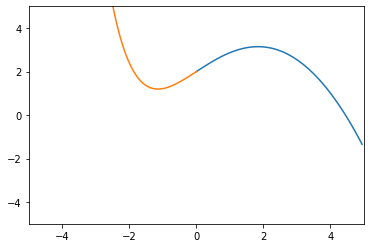

In [4]:
import math
from numpy import arange
from matplotlib.pyplot import plot, show, xlim, ylim

# y' = u
# u' = -y

def F(y, u, x):
    return (1-u-x)

a = 0
b1 = 5

h1 = 0.05


xpoints1 = []
for i in range(math.ceil((b1-a)/h1)):
    xpoints1.append(a)
    a = a + h1


    





ypoints1 = []
upoints1 = []

y1 = 2.0
u1 = 1.0

for x in xpoints1:
    ypoints1.append(y1)
    upoints1.append(u1)

    m11 = h1*u1
    k11 = h1*F(y1, u1, x)  #(x, v, t)

    m21 = h1*(u1 + 0.5*k11)
    k21 = h1*F(y1+0.5*m11, u1+0.5*k11, x+0.5*h1)

    m31 = h1*(u1 + 0.5*k21)
    k31 = h1*F(y1+0.5*m21, u1+0.5*k21, x+0.5*h1)

    m41 = h1*(u1 + k31)
    k41 = h1*F(y1+m31, u1+k31, x+h1)

    y1 += (m11 + 2*m21 + 2*m31 + m41)/6
    u1 += (k11 + 2*k21 + 2*k31 + k41)/6


xlim(-5, 5)
ylim(-5, 5)

plot(xpoints1, ypoints1)



a = 0
b = -5

h = -0.05

xpoints = []
for i in range(math.ceil((b-a)/h)):
    xpoints.append(a)
    a = a + h



ypoints = []
upoints = []

y = 2.0
u = 1.0
y_neg = 0
u_neg = 0
for x in xpoints:
    ypoints.append(y)
    upoints.append(u)

    m1 = h*u
    k1 = h*F(y, u, x)  #(x, v, t)

    m2 = h*(u + 0.5*k1)
    k2 = h*F(y+0.5*m1, u+0.5*k1, x+0.5*h)

    m3 = h*(u + 0.5*k2)
    k3 = h*F(y+0.5*m2, u+0.5*k2, x+0.5*h)

    m4 = h*(u + k3)
    k4 = h*F(y+m3, u+k3, x+h)

    y += (m1 + 2*m2 + 2*m3 + m4)/6
    u += (k1 + 2*k2 + 2*k3 + k4)/6



xlim(-5, 5)
ylim(-5, 5)

plot(xpoints, ypoints)
show()

[0, -0.05, -0.1, -0.15000000000000002, -0.2, -0.25, -0.3, -0.35, -0.39999999999999997, -0.44999999999999996, -0.49999999999999994, -0.5499999999999999, -0.6, -0.65, -0.7000000000000001, -0.7500000000000001, -0.8000000000000002, -0.8500000000000002, -0.9000000000000002, -0.9500000000000003, -1.0000000000000002, -1.0500000000000003, -1.1000000000000003, -1.1500000000000004, -1.2000000000000004, -1.2500000000000004, -1.3000000000000005, -1.3500000000000005, -1.4000000000000006, -1.4500000000000006, -1.5000000000000007, -1.5500000000000007, -1.6000000000000008, -1.6500000000000008, -1.7000000000000008, -1.7500000000000009, -1.800000000000001, -1.850000000000001, -1.900000000000001, -1.950000000000001, -2.000000000000001, -2.0500000000000007, -2.1000000000000005, -2.1500000000000004, -2.2, -2.25, -2.3, -2.3499999999999996, -2.3999999999999995, -2.4499999999999993, -2.499999999999999, -2.549999999999999, -2.5999999999999988, -2.6499999999999986, -2.6999999999999984, -2.7499999999999982, -2.7

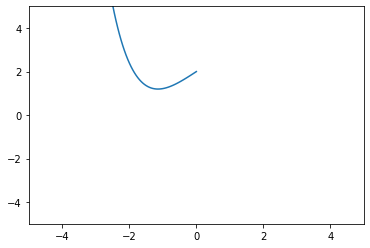

In [2]:
import math
from numpy import arange
from matplotlib.pyplot import plot, show, xlim, ylim

# y' = u
# u' = -y

def F(y, u, x):
    return (1-u-x)

a = 0
b = -5

h = -0.05

xpoints = []
for i in range(math.ceil((b-a)/h)):
    xpoints.append(a)
    a = a + h


print(xpoints)
ypoints = []
upoints = []

y = 2.0
u = 1.0
y_neg = 0
u_neg = 0
for x in xpoints:
    ypoints.append(y)
    upoints.append(u)

    m1 = h*u
    k1 = h*F(y, u, x)  #(x, v, t)

    m2 = h*(u + 0.5*k1)
    k2 = h*F(y+0.5*m1, u+0.5*k1, x+0.5*h)

    m3 = h*(u + 0.5*k2)
    k3 = h*F(y+0.5*m2, u+0.5*k2, x+0.5*h)

    m4 = h*(u + k3)
    k4 = h*F(y+m3, u+k3, x+h)

    y += (m1 + 2*m2 + 2*m3 + m4)/6
    u += (k1 + 2*k2 + 2*k3 + k4)/6



xlim(-5, 5)
ylim(-5, 5)

plot(xpoints, ypoints)
show()